# Code for Exercise 4. {-}

For this problem, I am using the dynamic programming template created by Jason DeBacker.

* Let our control be
$$
\mathrm{\{work, don't\;work\}} \to \mathrm{binary} (0,1\;\mathrm{choice}).
$$
Call this control $z$.
* The state is $w_t$ and $b$, since we know both at the time of the decision.
* The transition equation is $w' = \mathrm{E}_{0}\left[\sum_{t=0}^{\infty}\beta^{t}\mathrm{e}^{\mathcal{N}(\mu,\sigma)}\right]$ if $z=0$; otherwise, $w'=\mathrm{E}_{0}\left[\sum_{t=0}^{\infty}\beta^{t}b\right]$ if $z=1$.

First let's import the relevant modules:

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Here, we set our parameters equal to those specified in the problem:

In [12]:
β = 0.96 # rate of time preference
b = 0.05 # unemployment benefits
μ = 0.0 # mean of log wages
σ = 0.15 # SD of wage draws

We now set up our state space grid:

In [13]:
'''
------------------------------------------------------------------------
Create Grid for State Space    
------------------------------------------------------------------------
lb_w      = scalar, lower bound of grid
ub_w      = scalar, upper bound of grid 
size_w    = integer, number of grid points in state space
w_grid    = vector, size_w x 1 vector of grid points 
------------------------------------------------------------------------
'''
lb_w = .5
ub_w = 10
size_w = 200  # Number of grid points
w_grid = np.linspace(lb_w, ub_w, size_w)

In [14]:
'''
------------------------------------------------------------------------
Create grid of current utility values    
------------------------------------------------------------------------
Y        = matrix, current income
W        = wage, stochastically determined
------------------------------------------------------------------------
'''
Y = np.zeros((size_w, size_w))
W = []
for i in range(size_w):
    W.append(np.exp(np.random.normal(μ,σ)))
W=np.array(W)
for i in range(size_w): # loop over w
    for j in range(size_w): # loop over w'
        Y[i,j] = np.max((W[i]/(1-β), b + β*w_grid[j]))

# replace 0 and negative consumption with a tiny value 
# This is a way to impose non-negativity on cons
Y[Y<=0] = 1e-15

In [15]:
'''
------------------------------------------------------------------------
Value Function Iteration    
------------------------------------------------------------------------
VFtol     = scalar, tolerance required for value function to converge
VFdist    = scalar, distance between last two value functions
VFmaxiter = integer, maximum number of iterations for value function
V         = vector, the value functions at each iteration
Vmat      = matrix, the value for each possible combination of k and k'
Vstore    = matrix, stores V at each iteration 
VFiter    = integer, current iteration number
TV        = vector, the value function after applying the Bellman operator
PF        = vector, indicies of choices of k' for all k 
VF        = vector, the "true" value function
------------------------------------------------------------------------
'''
VFtol = 1e-8 
VFdist = 5.0 
VFmaxiter = 3000 
V = np.zeros(size_w) 
Vmat = np.zeros((size_w, size_w)) 
Vstore = np.zeros((size_w, VFmaxiter))
VFiter = 1 
while VFdist > VFtol and VFiter < VFmaxiter:  
    for i in range(size_w): # loop over w
        for j in range(size_w): # loop over w'
            Vmat[i, j] = Y[i, j] + β * V[j] 
      
    Vstore[:, VFiter] = V.reshape(size_w,) # store value function at each iteration for graphing later
    TV = Vmat.max(1) # apply max operator to Vmat (to get V(w))
    PF = np.argmax(Vmat, axis=1)
    VFdist = (np.absolute(V - TV)).max()  # check distance
    V = TV
    VFiter += 1 
    


if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            


VF = V # solution to the functional equation

Value function converged after this many iterations: 541


In [16]:
'''
------------------------------------------------------------------------
Find consumption and savings policy functions   
------------------------------------------------------------------------
optW  = vector, the optimal choice of w' for each w
optC  = vector, the optimal choice of y' for each y
------------------------------------------------------------------------
'''
optW = w_grid[PF]
optY = optW

Plotting the $\bf{value}$ $\bf{function}$, we have:

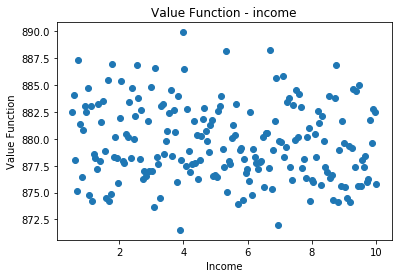

In [17]:
# Plot value function 
plt.figure()
# plt.plot(wvec, VF)
plt.scatter(w_grid[1:], VF[1:])
plt.xlabel('Income')
plt.ylabel('Value Function')
plt.title('Value Function - income')
plt.show()

<Figure size 432x288 with 0 Axes>

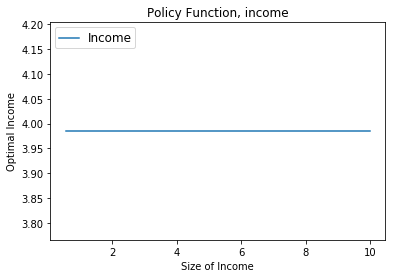

In [18]:
#Plot optimal consumption rule as a function of capital size
plt.figure()
fig, ax = plt.subplots()
ax.plot(w_grid[1:], optY[1:], label='Income')
# Now add the legend with some customizations.
legend = ax.legend(loc='upper left', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Income')
plt.ylabel('Optimal Income')
plt.title('Policy Function, income')
plt.show()

<Figure size 432x288 with 0 Axes>

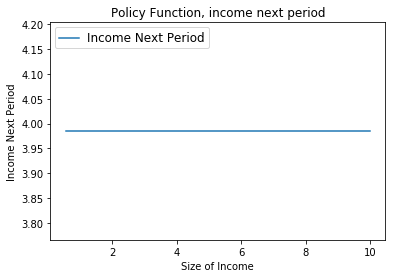

In [19]:
#Plot optimal consumption rule as a function of capital size
plt.figure()
fig, ax = plt.subplots()
ax.plot(w_grid[1:], optW[1:], label='Income Next Period')
# Now add the legend with some customizations.
legend = ax.legend(loc='upper left', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Income')
plt.ylabel('Income Next Period')
plt.title('Policy Function, income next period')
plt.show()